In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
data = loadtxt("tau10E7_vrot100_vout75_out.ascii", skiprows=1)
#data = loadtxt("tau10E7_vrot50_vout50_out.ascii", skiprows=1)
#data = loadtxt("tau10E7_vrot200_vout100_out.ascii", skiprows=1)

In [71]:
x=data[:,6]

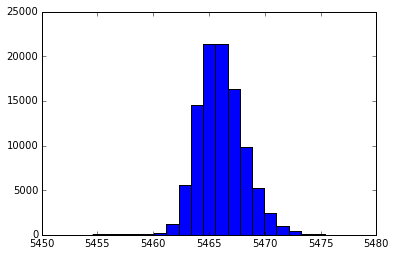

In [72]:
factor = -12.6
lambda_factor = 1216.0/3E5
line_center = 1216.0
z = 3.49
new_data = (1+z)*(x  * factor * lambda_factor + line_center)
a = hist(new_data, bins=20)
wavelength = a[1][1:]
intensity = a[0]

20


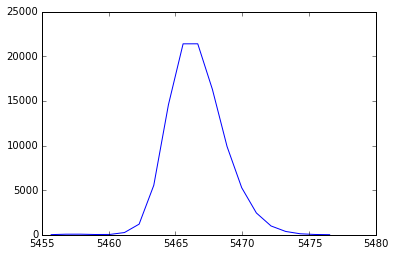

In [73]:
plot(wavelength, intensity[0:])
print size(wavelength)


In [74]:
from lmfit.models import LinearModel, LorentzianModel, SkewedGaussianModel

In [75]:
model = SkewedGaussianModel()
params = model.make_params(amplitude=20000, center = 5460, sigma=3, gamma = 2)
result =model.fit(intensity, params, x=wavelength)
print(result.fit_report())

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # function evals   = 103
    # data points      = 20
    # variables        = 4
    chi-square         = 160606.490
    reduced chi-square = 10037.906
[[Variables]]
    sigma:       2.89685657 +/- 0.020503 (0.71%) (init= 3)
    amplitude:   1.0911e+05 +/- 343.1212 (0.31%) (init= 20000)
    center:      5464.55180 +/- 0.015888 (0.00%) (init= 5460)
    gamma:       2.02997899 +/- 0.043782 (2.16%) (init= 2)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, center)             = -0.884 
    C(sigma, gamma)              =  0.854 
    C(center, gamma)             = -0.850 
    C(sigma, amplitude)          =  0.370 
    C(amplitude, center)         = -0.244 



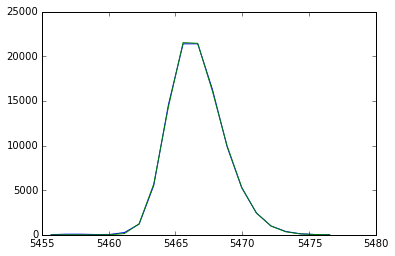

In [76]:
plot(wavelength,intensity)
plot(wavelength,result.best_fit)